# Spatial Data Import and Export 

## Introduction

How to move objects between **sp** and external formats, including formats typically used by GIS.  

Important Open Source projects:

   * Open Source Geospatial Foundation
   * Geospatial Data Abstraction Library (GDAL)
   * PROJ.4 Cartographic Projections library
   
## Coordinate Reference Systems

   Idealized concepts of an ideal ellipsoid, coordinate system origin, and Earth orientation.
    Coordinate reference systems (CRS) are at the heart of geodetics and cartography. CRS can be expressed in degrees and associated with an ellipse (model of the shape of the earth), a prime meridian defining the origin in longitude, and a datum. 
    The concept of datum is arbitrary and anchors a specific geographical CRS to an origin point in three dimensions.
    In contrast, projected CRS are expressed by a specific geometric model projecting to the plane and measures of length. Most countries have multiple CRS, often for very good reasons. Local datum and a local triangulation network is frequently used. 
    

   In summary:
     * The Earth is 'squashed' on the poles being represented by an ellipsoid model of representation (oblate spheroid)
     * The Earth is also 'lumpy' that must be account by an geoid model  
     A good representation takes into account spheroid form and its lumpyness.
     
### What is a Geodetic Datum?
  A set of constants specifying the coodinate systems used for geodetic control, i.e., calculating coordinated and elevation of points on the Earth (e.g., North American Datum of 1983, NAD83). There are hundreds of Data, and some country have more than one Datum. 
  
  #### Reference Frame
   realization of the Reference System through observation (GNSS, VLBI, SLR, DORES, Leveling). In practice the Reference Frame can be considered the same as a datum.
    
  #### Ellipsoid model: different parts of the world gives us different estimations of the ellipsoid measuments of (a-b/a)
  Eg: BESSEL 1841, CLARKE 1866, GEODETIC REFERENCE SYSTEM 1980 (GRS80), WORLD GEODETIC SYSTEM 1984 (WGS84) defined by the US Defense Mapping Agency (DMA) for GPS.
  
  #### Geoid model
  
  A model of global mean sea level that is used to measure precise surface elevations
  
### Using the EPSG List

We can use rgdal package to access EPSG list.It allow transformation as well as projections. Datum transformation is based on transformation to the World Geodetic System of 1984 (WGS84), or inverse tranformation from it to an alternative specified datum. WGS84 was introduced after measurements of earch from space had become very accurate and forms a framework into which local and national system may be fitted.

In [20]:
library(rgdal)
library(maptools)
setwd("/home/erick/spatial-data-with-r")

In [3]:
# ED50 is the European Datum 1950
EPSG <- make_EPSG()
EPSG[grep("^# ED50$", EPSG$note), ]

# SIRGAS is the official Datum of Brazil
EPSG <- make_EPSG()
EPSG[grep("^# SIRGAS 2000$", EPSG$note), ]

,code,note,prj4
,<I<int>>,<I<chr>>,<I<chr>>
159,4230,# ED50,"+proj=longlat +ellps=intl +towgs84=-87,-98,-121,0,0,0,0 +no_defs"


,code,note,prj4
,<I<int>>,<I<chr>>,<I<chr>>
321,4674,# SIRGAS 2000,"+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no_defs"
5316,4988,# SIRGAS 2000,+proj=geocent +ellps=GRS80 +units=m +no_defs


In [4]:
EPSG[grep("Atlas", EPSG$note), 1:2]

,code,note
,<I<int>>,<I<chr>>
662,2163,# US National Atlas Equal Area
2364,3978,# NAD83 / Canada Atlas Lambert
2365,3979,# NAD83(CSRS) / Canada Atlas Lambert


In [5]:
CRS("+init=epsg:2163")

CRS arguments:
 +init=epsg:2163 +proj=laea +lat_0=45 +lon_0=-100 +x_0=0 +y_0=0
+a=6370997 +b=6370997 +units=m +no_defs 

### PROJ.4 CRS Specification

CRS can assume two values: NA or a string conteining CRS information. It uses a 'tag=value' representation of coodinate reference systems. with tag and value paired in a single string.The different tags always begin with **+**, and are separated from the values by **=**.
    In the following example, **+proj** projection takes **longlat** for geographical coodinates and **+ellps** for the ellipsoid, with value intl for the Internation Elllipsoid of 1909. The last tag **towgs84** indicating the WGS84 transformation.

In [6]:
CRS("+init=epsg:4230")

CRS arguments:
 +init=epsg:4230 +proj=longlat +ellps=intl +towgs84=-87,-98,-121,0,0,0,0
+no_defs 

## Degrees, Minutes, and Seconds

Values are often recorded not as decimal degrees, but as degrees, minutes and decimal seconds, or some truncation of this. For pratical pursposes, geographical coordinates should be converted to decimal degree form.

In [7]:
# Netherlands point
IJ.dms.E <- "4d31'00\"E"
IJ.dms.N <- "52d28'00\"N"

In [8]:
# to convert to DMS class
IJ_east <- char2dms(IJ.dms.E)
IJ_east
IJ_north <- char2dms(IJ.dms.N)
IJ_north

getSlots("DMS")

[1] 4d31'E

[1] 52d28'N

WS       deg       min       sec        NS 
"logical" "numeric" "numeric" "numeric" "logical"

In [9]:
# by coercing DMS to 'numeric', we get the decimal equivalent
c(as(IJ_east, "numeric"), as(IJ_north, "numeric"))

[1]  4.516667 52.466667

## Vector File Format

GIS vector data can be either topological or simple. Vector classes in **sp** are simple, meaning that for each polygon all coordinates are stored withou checking that boundaries have correspoing point.
    A format that is commonly used for exchanging vector data is the shapefile. This file format has been specified by ESRI. This format uses at least three files to represent the data, a file of geometries with .shp extension, an index file to the geometries .shx, and a legacy .dbf file for storing attribute data. If there is an .prj file, it will contain an ESRI text CRS specification. 
    
## Raster Files Format

There are many raster and image formas such as the ones that allow on band of data, others assume Red-Green-Blue (RGB).

## Using GDAL Drivers in rgdal

In [10]:
auck_el1 <- readGDAL("70042108.tif")
summary(auck_el1)
is.na(auck_el1$band1) <- auck_el1$band1 <= 0 | auck_el1$band1 > 10000

70042108.tif has GDAL driver GTiff 
and has 1200 rows and 1320 columns


Object of class SpatialGridDataFrame
Coordinates:
    min   max
x 174.2 175.3
y -37.5 -36.5
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0]
Grid attributes:
  cellcentre.offset     cellsize cells.dim
x         174.20042 0.0008333333      1320
y         -37.49958 0.0008333333      1200
Data attributes:
     band1           
 Min.   :-3.403e+38  
 1st Qu.: 0.000e+00  
 Median : 1.000e+00  
 Mean   :-1.869e+34  
 3rd Qu.: 5.300e+01  
 Max.   : 6.860e+02  

##  Creatin GDAL file

* Let's create a simple output inverse distance weighted interpolated values of Mause Bank logarithms of zinc ppm as a GeoTiff file

In [14]:
data(meuse) 
class(meuse)
library(gstat)

# promotes to SpatialPointsDataFrame
coordinates(meuse) = c("x", "y") 

# data frame
data(meuse.grid) 
class(meuse.grid)
#gridded(meuse.grid) = TRUE

# promotes to SpatialPointsDataFrame and then to SpatialPixelsDataFrame
coordinates(meuse.grid) = c("x", "y") 
# kriggging
log_zinc <- krige(log(zinc)~1,meuse,meuse.grid)["var1.pred"]

[1] "data.frame"

[1] "data.frame"

[inverse distance weighted interpolation]


In [15]:
summary(meuse.grid)

Object of class SpatialPointsDataFrame
Coordinates:
     min    max
x 178460 181540
y 329620 333740
Is projected: NA 
proj4string : [NA]
Number of points: 3103
Data attributes:
     part.a           part.b            dist        soil     ffreq   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   1:1665   1: 779  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.1193   2:1084   2:1335  
 Median :0.0000   Median :1.0000   Median :0.2715   3: 354   3: 989  
 Mean   :0.3986   Mean   :0.6014   Mean   :0.2971                    
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.4402                    
 Max.   :1.0000   Max.   :1.0000   Max.   :0.9926                    

In [16]:
proj4string(log_zinc) <- CRS(proj4string(meuse))
summary(log_zinc)

gridded(log_zinc) = TRUE


Object of class SpatialPointsDataFrame
Coordinates:
     min    max
x 178460 181540
y 329620 333740
Is projected: NA 
proj4string : [NA]
Number of points: 3103
Data attributes:
   var1.pred    
 Min.   :4.791  
 1st Qu.:5.484  
 Median :5.694  
 Mean   :5.777  
 3rd Qu.:6.041  
 Max.   :7.482  

In [17]:
writeGDAL(log_zinc, fname = "log_zinc.tif", driver = "GTiff", type = "Float32", options = "INTERLEAVE=PIXEL")
GDALinfo("log_zinc.tif")

Warning message in GDALinfo("log_zinc.tif"):
“statistics not supported by this driver”


rows        104 
columns     78 
bands       1 
lower left origin.x        178440 
lower left origin.y        329600 
res.x       40 
res.y       40 
ysign       -1 
oblique.x   0 
oblique.y   0 
driver      GTiff 
projection  NA 
file        log_zinc.tif 
apparent band summary:
   GDType hasNoDataValue NoDataValue blockSize1 blockSize2
1 Float32          FALSE           0         26         78
apparent band statistics:
         Bmin       Bmax Bmean Bsd
1 -4294967295 4294967295    NA  NA

## Overlay

In [57]:
library(sf)
library(raster)


gridded(auck_el1) <- TRUE
class(auck_el1)
auck_el1 <- SpatialPoints(auck_el1, proj4string=CRS("+proj=longlat +ellps=WGS84"))
class(auck_el1)

transect_el1 <- over(auck_el1, transect_sp)

[1] "SpatialPixels"
attr(,"package")
[1] "sp"

[1] "SpatialPoints"
attr(,"package")
[1] "sp"

ERROR: Error in `[.data.frame`(x@data, , i, drop = FALSE): undefined columns selected


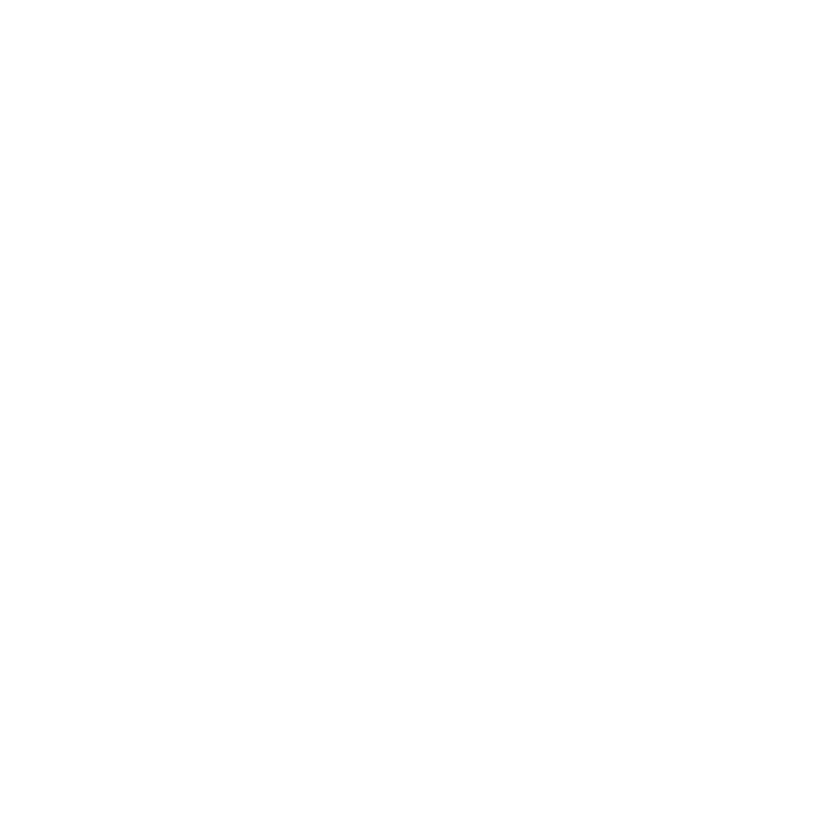

In [105]:
oopar <- par(mar=c(1,1,1,1)+0.1)
grys <- grey.colors(8, 0.55, 0.95, 2.2)

auck_el1 <- as(auck_el1, "SpatialPixels")
image(auck_el1, "band1", col=grys)
plot(auck_gshhs, add=TRUE, pbg="white")


transect_sp <- SpatialPoints(coords=cbind(seq(174.458,175.3,0.000833333), c(-37.03625)), proj4string=CRS("+proj=longlat +ellps=WGS84"))
plot(transect_sp, add=TRUE, pch="-", cex=2)
#legend_image(c(174.2,174.25), c(-37.5,-37.2), auck_el1$band1, vertical=TRUE, offset.leg=0.8, col=grys)
par(oopar)

In [112]:
load("auck_gshhs.RData")
grys <- grey.colors(8, 0.55, 0.95, 2.2)


auck_el1 <- as(auck_el1, "SpatialPixels")
image(auck_el1,col=grys)
auck_gshhs <- SpatialPoints(auck_gshhs, proj4string=CRS("+proj=longlat +ellps=WGS84"))

plot(auck_gshhs, add=TRUE)
transect_sp <- SpatialPoints(coords=cbind(seq(174.458,175.3,0.000833333),                                           c(-37.03625)), proj4string=CRS("+proj=longlat +ellps=WGS84"))
plot(transect_sp, add=TRUE, pch="-", cex=2)

ERROR: Error in as(auck_el1, "SpatialPixels"): no method or default for coercing “logical” to “SpatialPixels”


## Spatial Sampling


   Research setting like the one described might be to sample points from the total study area, to be able to examine whether the  observed phenomena seem to be associated with particular ranges of values of the supposed environmental 'drivers'.

   Schemes for spatial sampling have been given in the literature, for example Ripley (1981 pp 19-27), and they are available in **sp** using generic method **spsample**. Five sampling schemes are available:
   
   * *random*: places points at random within the sampling area
   * *regular*: a grid offset can be set
   * *stratified*: samples one point at random in each cell
   * *nonaligned*: systematic masked scheme using combinations of random x and y to yield a single coordinate in each cell.
   
   

[1] "SpatialPoints"
attr(,"package")
[1] "sp"

./70042108.tif has GDAL driver GTiff 
and has 1200 rows and 1320 columns


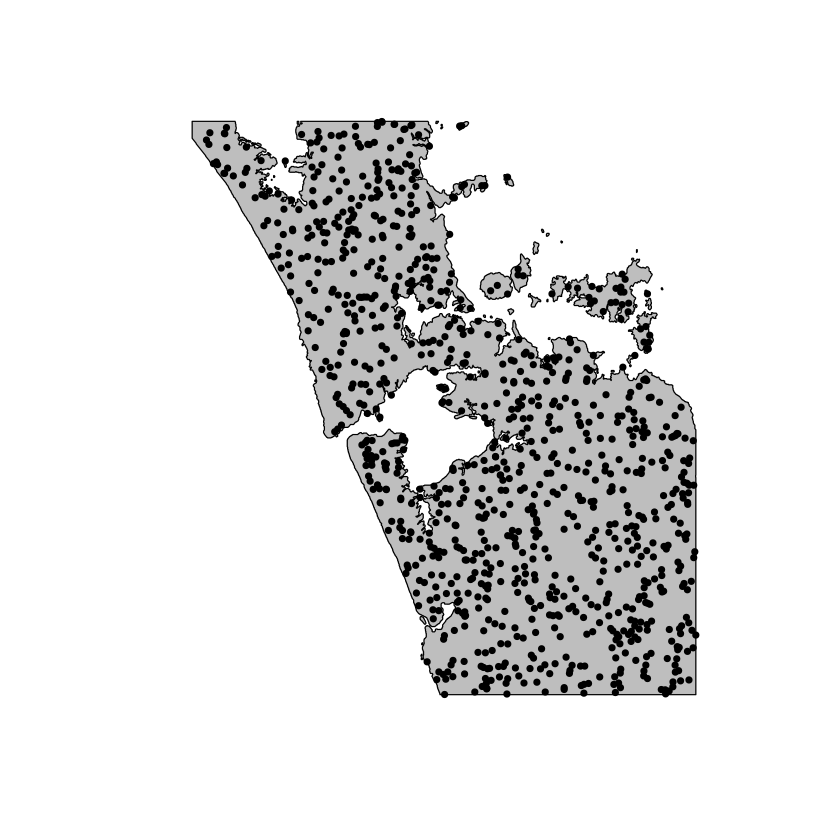

In [141]:
library(raster)
set.seed(9876)
load("auck_gshhs.RData")
plot(auck_gshhs, col = "grey")


load("auck_el1.RData")

## Preparing the files
#class(auck_gshhs)
#auck_gshhs <- SpatialPoints(auck_gshhs, proj4string=CRS("+proj=longlat +ellps=WGS84"))
#class(auck_el1)
#auck_el1 <- SpatialPoints(auck_el1, proj4string=CRS("+proj=longlat +ellps=WGS84"))



polygon_random <- spsample(auck_gshhs, 1000, type = "random")
plot(polygon_random, add= TRUE, col = "black", pch = 20)
class(polygon_random)
#polygon_random_el1 <- over(auck_el1, polygon_random)




auck_el1 <- readGDAL("./70042108.tif")
auck_el2 <- as(auck_el1, "SpatialPixelsDataFrame")
grid_random <- spsample(auck_el2, 1000, type = "random")
grid_random_el1 <- over(auck_el1, grid_random)
#plot(grid_random)




#grid_regular <- spsample(auck_el2, 1000, type = "regular")
#grid_regular_el1 <- over(auck_el1, grid_regular)

#plot(polygon_random, col = "grey")
#class(polygon_random )